In [1]:
# https://www.analyticsvidhya.com/blog/2020/11/binary-cross-entropy-aka-log-loss-the-cost-function-used-in-logistic-regression/

In [10]:
import os
current_directory = os.getcwd()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
# Read the CSV file using Pandas
parent_directory = os.path.dirname(current_directory)
# print(parent_directory)
file_path = os.path.join(parent_directory,"Task_2.csv")
df = pd.read_csv(file_path)
df

,X1,X2,Y
0,5.993428,5.584629,False
1,4.723471,6.579355,False
2,6.295377,6.657285,True
3,8.046060,6.197723,True
4,4.531693,6.838714,False
...,...,...,...
95,2.072970,7.385317,False
96,5.592241,6.116143,True
97,5.522111,7.153725,True
98,5.010227,7.058209,True


In [17]:
# import data
X1 = df['X1']
X2 = df['X2']
Y = df['Y']
    

0     5.993428
1     4.723471
2     6.295377
3     8.046060
4     4.531693
        ...   
95    2.072970
96    5.592241
97    5.522111
98    5.010227
99    4.530826
Name: X1, Length: 100, dtype: float64

In [18]:
# Hyperparameters
alpha = 0.01  # Learning rate
epochs = 1000  # Number of iterations
convergence_threshold = 1e-5  # Convergence threshold for stopping gradient descent


In [19]:
# Initialize coefficients
beta0 = 0
beta1 = 0
beta2 = 0

In [20]:
# Gradient Descent Optimization
for epoch in range(epochs):
    # Calculate the logistic function (sigmoid)
    z = beta0 + beta1 * X1 + beta2 * X2
    sigmoid = 1 / (1 + np.exp(-z))

    # Calculate the gradients
    gradient_beta0 = np.mean(sigmoid - Y)
    gradient_beta1 = np.mean((sigmoid - Y) * X1)
    gradient_beta2 = np.mean((sigmoid - Y) * X2)


    # Update coefficients
    beta0 -= alpha * gradient_beta0
    beta1 -= alpha * gradient_beta1
    beta2 -= alpha * gradient_beta2

    # Check for convergence
    if abs(gradient_beta0) < convergence_threshold and abs(gradient_beta1) < convergence_threshold and abs(gradient_beta2) < convergence_threshold:
        break

In [21]:
# Print the coefficients
print("Logistic Regression without Libraries (Gradient Descent Optimization):")
print("Intercept (beta0):", beta0)
print("Coefficient for X1 (beta1):", beta1)
print("Coefficient for X2 (beta2):", beta2)


Logistic Regression without Libraries (Gradient Descent Optimization):
Intercept (beta0): -0.31319632497122485
Coefficient for X1 (beta1): 0.6983763963875861
Coefficient for X2 (beta2): -0.4326666528397437


In [22]:
# Make predictions
Y_pred = np.round(1 / (1 + np.exp(-(beta0 + beta1 * X1 + beta2 * X2))))


In [23]:
# Evaluate the model (Accuracy)
accuracy = np.mean(Y_pred == Y)
print("Accuracy:", accuracy)

Accuracy: 0.7


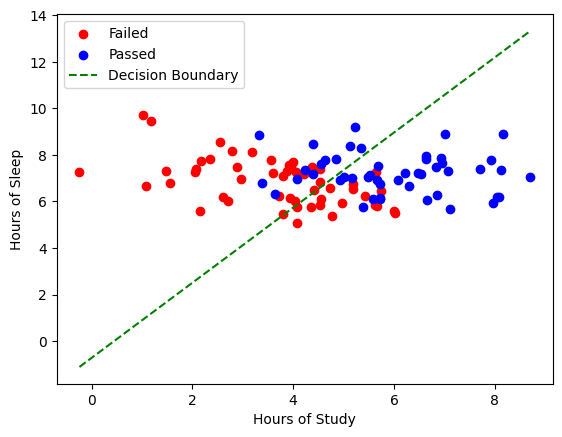

In [24]:
# Plot the data points
plt.scatter(X1[Y == 0], X2[Y == 0], color='red', label='Failed')
plt.scatter(X1[Y == 1], X2[Y == 1], color='blue', label='Passed')

# Plot the decision boundary (linear)
x_boundary = np.linspace(min(X1), max(X1), 100)
y_boundary = (-beta0 - beta1 * x_boundary) / beta2

plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='Decision Boundary')

# Add labels and legend
plt.xlabel('Hours of Study')
plt.ylabel('Hours of Sleep')
plt.legend()
plt.show()